In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv("C:\LCIT\SEMESTER_1\AISC1006_SP\Fraud.csv")

In [3]:
#Shape of dataset
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
#missing values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
#data types
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
#Summary Statistics
df.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<Figure size 1200x800 with 0 Axes>

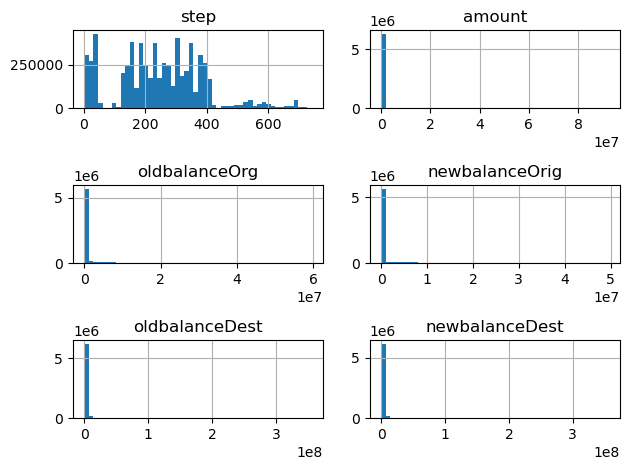

In [34]:
# Visualizing Numerical features with Histogram plots
dataNum = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

plt.figure(figsize=(12, 8))
dataNum.hist(bins=50)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

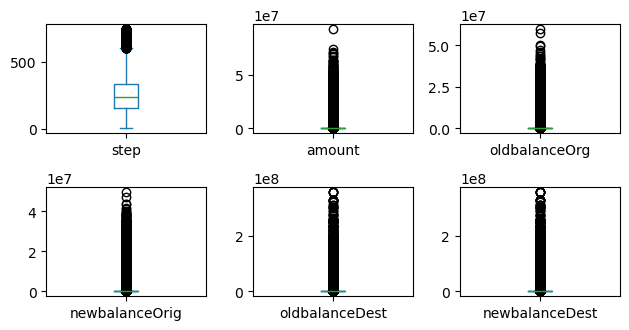

In [40]:
# Visualizing Numerical features with box plots to cross-check outliers
dataNum = df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']]

plt.figure(figsize=(12, 8))
dataNum.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [9]:
#Checking values in categorial features
dataUnq=[df.isFraud.unique(), df.isFlaggedFraud.unique(), df.type.unique()]
dataUnq

[array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
       dtype=object)]

<Figure size 1200x800 with 0 Axes>

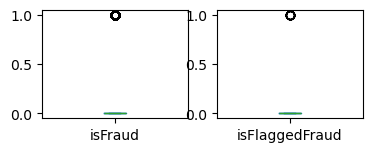

In [11]:
# Visualizing categorial features having Numeric values with box plots
dataCatn=df[['isFraud', 'isFlaggedFraud']] 
plt.figure(figsize=(12, 8))
dataCatn.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False)
plt.show()

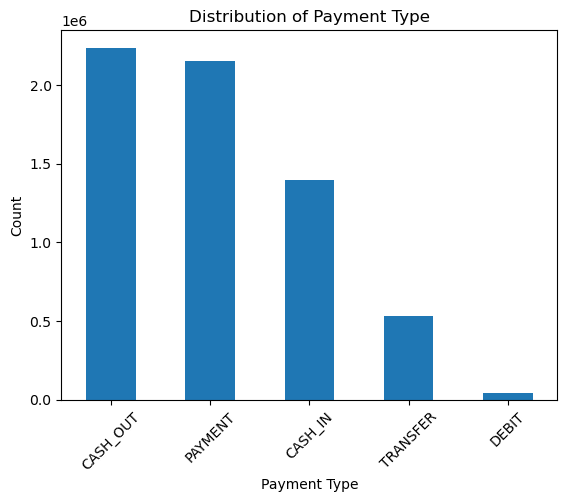

In [76]:
# Visualizing categorial features having String values with bar plots to show frequency of each value.
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [92]:
#analyze the nameDest feature with respect to fraudulent transactions

# Filter the data to include only fraudulent transactions
fraudulent_transactions = df[df['isFraud'] == 1]

# Count the occurrences of each nameDest in fraudulent transactions
nameDest_fraud_counts = fraudulent_transactions['nameDest'].value_counts()

# Display the counts
print("Count of Accounts in fraudulent transactions:")
print(nameDest_fraud_counts)

# Identify nameDest with multiple frauds
multiple_frauds = nameDest_fraud_counts[nameDest_fraud_counts > 1]

# Display the nameDest with multiple frauds
print("\nAccounts with multiple fraudulent transactions:")
print(multiple_frauds.shape)


Count of Accounts in fraudulent transactions:
nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
              ..
C317811789     1
C24324787      1
C1053414206    1
C2013070624    1
C873221189     1
Name: count, Length: 8169, dtype: int64

Accounts with multiple fraudulent transactions:
(44,)


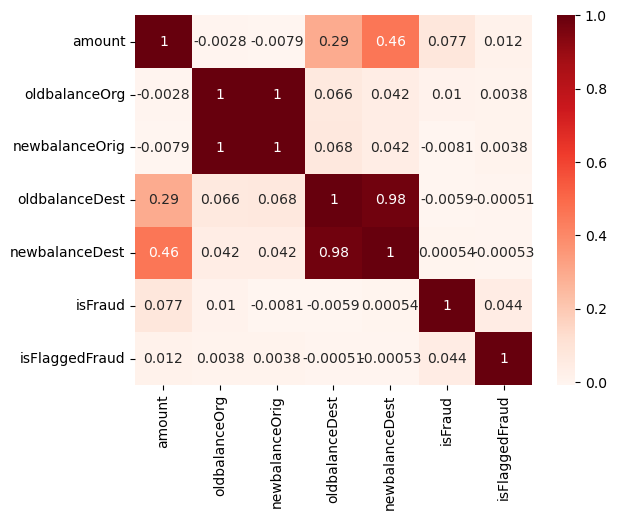

In [96]:
#Coorelation matrix
corr_matrix = df[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.show()

Data Splitting 60,20,20

In [98]:
# Drop high cardinality features
df = df.drop(columns=['nameOrig', 'nameDest'])

from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=['isFraud'])  # Assuming 'isFraud' is the target
y = df['isFraud']


# First split: 60% training and 40% temporary
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Second split: 50% validation and 50% test from the temporary set (results in 20% each of original data)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (3817572, 8)
Validation set shape: (1272524, 8)
Test set shape: (1272524, 8)


#Data Preprocessing

no missing values in data.
outliers in data.

numeric features: [step, amount, oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest].

Categorial features: [type, nameOrig, nameDest, isFlaggedFraud].

Using Winsorization method to handle outliers in numeric features.
It Cap the extreme values by replacing them with the nearest non-outlier value.

Drop high cardinality features ['nameOrig', 'nameDest']: more unique values, and not crucial for the prediction.

In [102]:
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder

# Define the numeric and categorical features
numeric_features = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_features = ['type', 'isFlaggedFraud']

# Function to preprocess data
def preprocess_data(X, numeric_features, categorical_features):
    # Apply Winsorization to each numeric feature
    for feature in numeric_features:
        X[feature] = winsorize(X[feature], limits=[0.10, 0.10])
    
    # Apply One-Hot Encoding to the remaining categorical features
    X = pd.get_dummies(X, columns=categorical_features)
    
    return X

# Apply preprocessing to each set
X_train_preprocessed = preprocess_data(X_train.copy(), numeric_features, categorical_features)
X_val_preprocessed = preprocess_data(X_val.copy(), numeric_features, categorical_features)
X_test_preprocessed = preprocess_data(X_test.copy(), numeric_features, categorical_features)

print("Training set shape after preprocessing:", X_train_preprocessed.shape)
print("Validation set shape after preprocessing:", X_val_preprocessed.shape)
print("Test set shape after preprocessing:", X_test_preprocessed.shape)

Training set shape after preprocessing: (3817572, 13)
Validation set shape after preprocessing: (1272524, 13)
Test set shape after preprocessing: (1272524, 13)


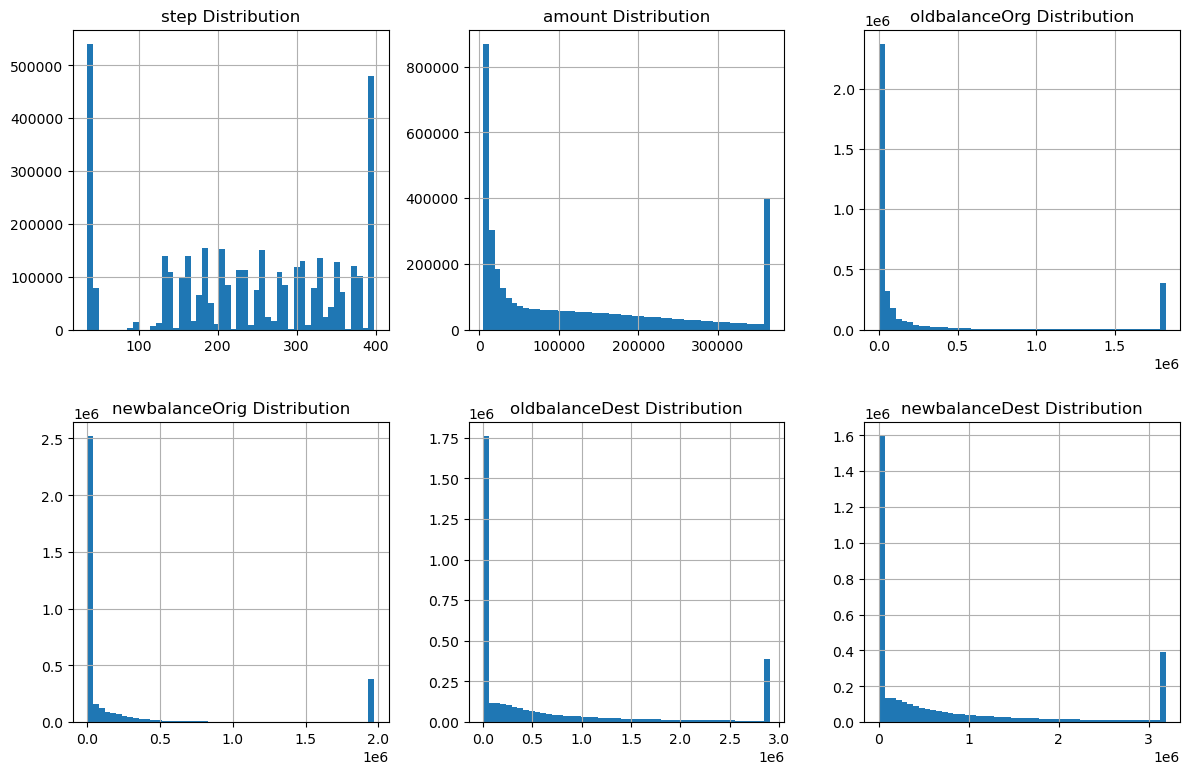

In [103]:
## Visualizing Numerical features with histograms after applying Winsorization

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numeric_features):
    plt.subplot(2, 3, i + 1)
    X_train_preprocessed[feature].hist(bins=50)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

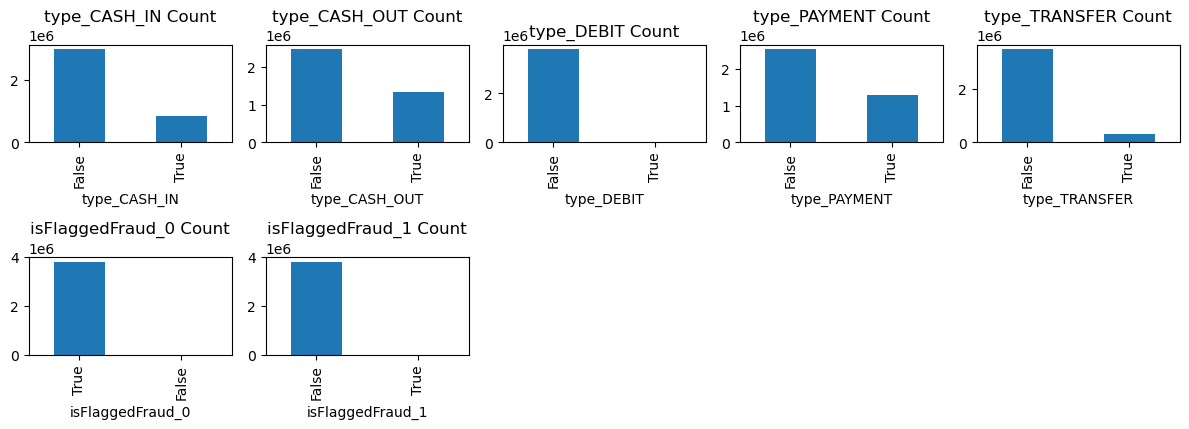

In [104]:
# Visualizing Categorial features with bar plots after OneHot Encoding

one_hot_features = [col for col in X_train_preprocessed.columns if col.startswith(tuple(categorical_features))]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(one_hot_features):
    plt.subplot(4, 5, i + 1)
    X_train_preprocessed[feature].value_counts().plot(kind='bar')
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()

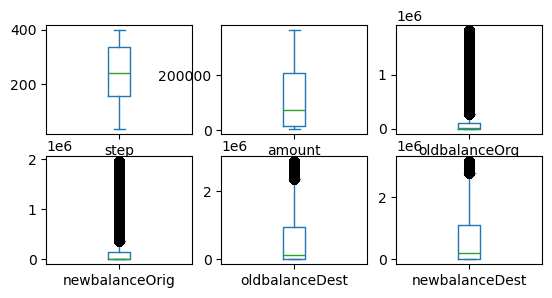

<Figure size 1200x800 with 0 Axes>

In [123]:
dataNum2=X_train_preprocessed[['step','amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest']]
dataNum2.plot(kind='box', subplots=True, layout =(3,3), sharex=False, sharey=False)
plt.figure(figsize=(12, 8))
plt.tight_layout()
plt.show()

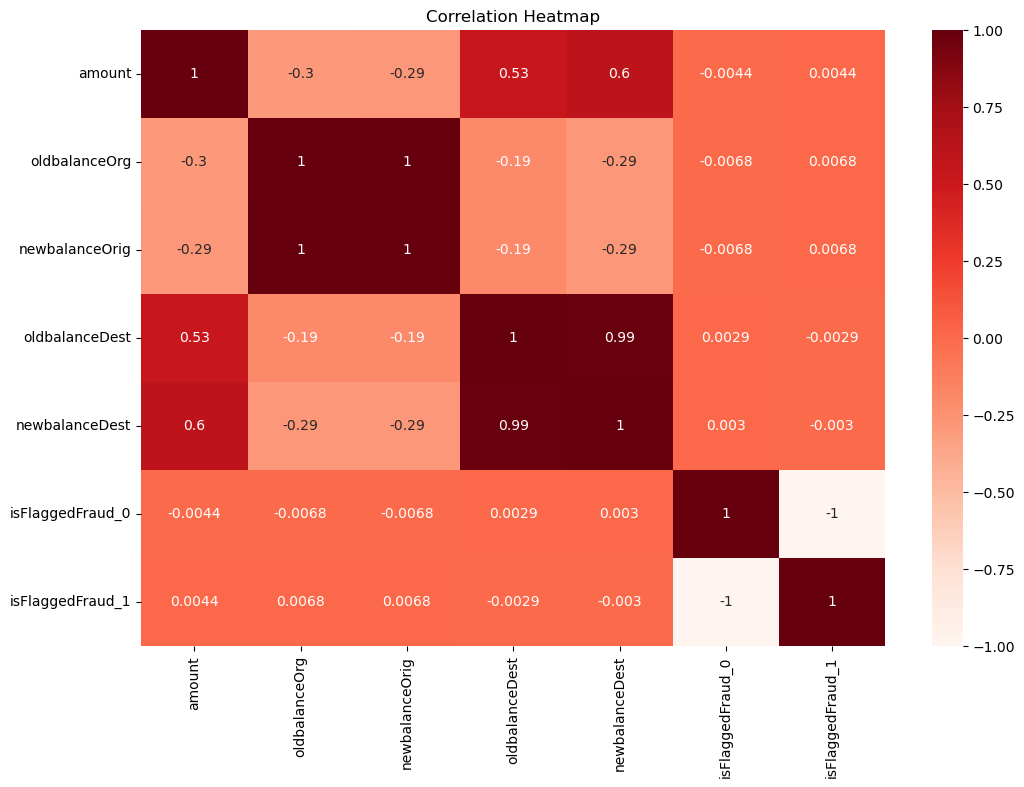

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_0,isFlaggedFraud_1
950383,44,28970.24,5043.00,0.0,0.00,28970.24,False,True,False,False,False,True,False
4726448,332,113276.32,766.00,0.0,1395944.95,1509221.27,False,True,False,False,False,True,False
812365,40,7111.48,0.00,0.0,0.00,0.00,False,False,False,True,False,True,False
2674942,210,365367.51,229653.00,0.0,124339.15,504764.29,False,False,False,False,True,True,False
5703950,398,27822.19,451325.69,423503.5,0.00,0.00,False,False,False,True,False,True,False


In [107]:
# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix2 = X_train_preprocessed[['amount', 'oldbalanceOrg', 'newbalanceOrig',
        'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud_0', 'isFlaggedFraud_1']].corr()
corr = corr_matrix2.corr()
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title('Correlation Heatmap')
plt.show()
X_train_preprocessed.head()

In [108]:
X_train_preprocessed.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFlaggedFraud_0,isFlaggedFraud_1
950383,44,28970.24,5043.00,0.00,0.00,28970.24,False,True,False,False,False,True,False
4726448,332,113276.32,766.00,0.00,1395944.95,1509221.27,False,True,False,False,False,True,False
812365,40,7111.48,0.00,0.00,0.00,0.00,False,False,False,True,False,True,False
2674942,210,365367.51,229653.00,0.00,124339.15,504764.29,False,False,False,False,True,True,False
5703950,398,27822.19,451325.69,423503.50,0.00,0.00,False,False,False,True,False,True,False
144379,35,196024.25,651078.14,847102.39,630435.82,434411.57,True,False,False,False,False,True,False
5226608,370,28946.68,1822610.84,1971095.37,52911.51,23964.83,True,False,False,False,False,True,False
2878496,228,223761.95,25251.00,249012.95,0.00,0.00,True,False,False,False,False,True,False
2857698,227,23234.39,0.00,0.00,0.00,0.00,False,False,False,True,False,True,False
6123367,398,40113.84,530931.00,490817.16,0.00,0.00,False,False,False,True,False,True,False


Model Building

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model.fit(X_train_preprocessed, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [116]:
# Predict on validation set
y_val_pred = model.predict(X_val_preprocessed)

# Evaluate the model
print("Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_val_pred))

Validation Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.88      0.43      0.58      1596

    accuracy                           1.00   1272524
   macro avg       0.94      0.72      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270831      97]
 [    906     690]]


In [117]:
# Predict on test set
y_test_pred = model.predict(X_test_preprocessed)

# Evaluate the model
print("Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.89      0.46      0.60      1670

    accuracy                           1.00   1272524
   macro avg       0.94      0.73      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270756      98]
 [    906     764]]


Analysis on Model Performance

Precision(correctly predicted fraudulent transactions out of all transactions predicted as fraudulent)
Class 0(non-fraudulent):  1 (both val and test)
Class 1(fraudulent): 0.88(val), 0.89(test)

Recall(Sensitivity): (Correctly predicted fradualent out of all actual fradulent transactions)
Class 0(non-fraudulent):  1 (both test and val)
Class 1(fraudulent): 0.43(val), 0.46(test)

F1 Score (mean of Precision and Recall)
Class 0(non-fraudulent):  1 (both test and val)
Class 1(fraudulent): 0.58(val), 0.60(test)

Accuracy: TP+TN/ Total is 1(both val and test sets)

Support: no of actual occurances of each class in the dataset.

We have to improve the model's performance, especially in detecting fraudulent transactions.
Model tuning to improve the recall for fraudulent transactions while maintaining good precision.

In [128]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

#Initialize the model
decision_tree = DecisionTreeClassifier(random_state=42)

#Train the model
decision_tree.fit(X_train_preprocessed, y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
#predict on the validation set
y_val_pred = decision_tree.predict(X_val_preprocessed)


#Evaluate the model on the validation set
print("Decision Tree Validation Set Evaluation:")
print(classification_report(y_val, y_val_pred))

Decision Tree Validation Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270928
           1       0.73      0.88      0.80      1596

    accuracy                           1.00   1272524
   macro avg       0.86      0.94      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



In [132]:
#Predict on the test set
y_test_pred = decision_tree.predict(X_test_preprocessed)

# Evaluate the model
print("Decision Tree Test Set Evaluation:")
print(classification_report(y_test, y_test_pred))

Decision Tree Test Set Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270854
           1       0.88      0.86      0.87      1670

    accuracy                           1.00   1272524
   macro avg       0.94      0.93      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



F1 Score (mean of Precision and Recall) Class 0(non-fraudulent): 1 (both test and val) Class 1(fraudulent): 0.80(val), 0.87(test)